In [1]:
import sys
import os

# Récupérer le chemin absolu du dossier parent
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ajouter ce chemin aux modules Python
sys.path.append(parent_dir)
print(parent_dir)

c:\Users\manon\OneDrive\Bureau\X\EA\rna-folding


### MODULE RNA SEQUENCE ###

In [2]:
from modules.rna_sequence2 import *

In [3]:
##Test functions

xp="ACGt--CGACUAGC-"
yp="-cGuCGU-ACTCGCG"
print(sequence_identity(xp,yp))
print(xp,yp)
print(edges_alignement(xp,yp))
print(core_sequence(xp))

0.5333333333333333
ACGt--CGACUAGC- -cGuCGU-ACTCGCG
[(2, 1), (3, 2), (4, 3), (5, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12)]
ACGTCGACUAGC


### MODULE RNA STRUCTURE

In [4]:
from modules.rna_structure2 import *

In [5]:
base_pairs={(2,8),(3,7),(9,13)}
print(dot_bracket_string(13, base_pairs))
parse_RNA_structure(".((...))(...)")

.((...))(...)


[(1, 7), (2, 6), (8, 12)]

### MODULE MAP STRUCTURE SEQUENCE

In [6]:
from modules.map_structure_sequence import *

In [7]:
list_of_car=["(","(",".",")",")","."]
get_rid_brackets_cl(list_of_car, 4)
print(list_of_car)

alg_str="GCC-CUUAG-U-GAAUCCAGC"
dbs="((.((...))(((...)))))"
print(projection(alg_str,dbs))

reverse_projection("C-AG", "(.)")

['.', '(', '.', ')', '.']
('GCCCUUAGUGAAUCCAGC', '((.(...)((...).)))')


'(-.)'

### Single RNA structure

In [8]:
from modules.single_RNA_structure import *
from modules.simplecount import *

[(13, 17), (12, 18), (19, 22), (11, 23), (10, 24), (35, 39), (34, 40), (33, 41), (32, 42), (31, 43), (30, 44), (29, 54), (59, 64), (65, 69), (58, 70), (57, 71), (56, 72), (55, 73), (28, 74), (27, 75), (25, 76), (6, 77), (5, 78), (4, 79), (3, 80), (2, 81), (1, 82), (0, 83)]


In [9]:
str_example="GCACGACG"
m=0
nuss_example=nussinov_matrix(str_example, simple_count_cost,m)
for lign in nuss_example:
    print(lign)
bp1=nussinov_TB(str_example, nuss_example, simple_count_cost, m)
print(bp1)
dot_bracket_string(len(str_example), bp1, 0)
sequence_test="GGGAAAUCC"
pb2=RNA_consensus_structure(sequence_test, simple_count_cost, 0)
dot_bracket_string(len(sequence_test),pb2,0)

[0, 1, 1, 1, 2, 2, 2, 3]
[0, 0, 0, 0, 1, 1, 1, 2]
[0, 0, 0, 0, 1, 1, 1, 2]
[0, 0, 0, 0, 1, 1, 1, 2]
[0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0]
[(0, 1), (4, 6), (3, 7)]


'(((...)))'

### MAXIMUM TOTAL ACCURACY

In [10]:
from modules.MTA import *

In [11]:
MTA (["-GCC-AAA-GGC","GGGC-AUU-GCC", "-ACGGAAUCCGU"],1)

['-GCC-AAA-GGC', 'GGGC-AUU-GCC', '-ACGGAAUCCGU']
['-(((-...-)))', '((.(-...-)))', '-((((...))))']


'.((((...))))'

### MAXIMUM EXPECTED ACCURACY

In [12]:
from modules.MEA import *

In [13]:
constante=1

In [14]:
MEA (["-GCC-AAA-GGC","GGGC-AUU-GCC", "-ACGGAAUCCGU"], constante)

['-GCC-AAA-GGC', 'GGGC-AUU-GCC', '-ACGGAAUCCGU']
['.(((.....)))', '.(((.....)))', '.((((...))))']
[[3.0, 5.950070371155748, 6.327220520276567, 6.501106119235844, 6.672640717728862, 8.725418609268491, 11.725415843141302, 14.725317818986976, 17.72523121684828, 19.77821530813653, 25.262840032983142, 30.740486861264294], [0, 2.950070371155748, 3.3272205202765672, 3.501106119235844, 3.6726407177288607, 5.72541860926849, 8.7254158431413, 11.725317818986975, 14.725231216848277, 16.77821530813653, 22.262840032983142, 27.740486861264294], [0, 0, 0.37715014912081934, 0.5510357480800958, 0.7225703465731128, 2.775348238112742, 5.775345471985553, 8.775247447831227, 11.775160845692529, 13.828144936980783, 19.312769661827396, 24.790416490108544], [0, 0, 0, 0.17388559895927647, 0.34542019745229346, 2.3981980889919225, 5.3981953228647335, 8.398097298710407, 11.39801069657171, 13.450994787859964, 18.935619512706577, 24.413266340987725], [0, 0, 0, 0, 0.171534598493017, 2.224312490032646, 5.22430972390545

'...((.....))'

### MEA with conservation score

In [15]:
from modules.MEA_conservation import *

In [16]:
MEA_conservation (["-GCC-AAA-GGC","GGGC-AUU-GCC", "-ACGGAAUCCGU"], 1, 1/2)

['-GCC-AAA-GGC', 'GGGC-AUU-GCC', '-ACGGAAUCCGU']
['.(((.....)))', '.(((.....)))', '.((((...))))']
[[3.0, 5.950070371155748, 6.327220520276567, 6.501106119235844, 6.672640717728862, 8.725418609268491, 11.725415843141302, 14.725317818986976, 17.72523121684828, 21.551345617888998, 25.174195468768183, 26.224500391692683], [0, 2.950070371155748, 3.3272205202765672, 3.501106119235844, 3.6726407177288607, 5.72541860926849, 8.7254158431413, 11.725317818986975, 14.725231216848277, 18.551345617888998, 22.174195468768183, 23.224500391692683], [0, 0, 0.37715014912081934, 0.5510357480800958, 0.7225703465731128, 2.775348238112742, 5.775345471985553, 8.775247447831227, 11.775160845692529, 15.601275246733252, 19.224125097612433, 19.790416490108544], [0, 0, 0, 0.17388559895927647, 0.34542019745229346, 2.3981980889919225, 5.3981953228647335, 8.398097298710407, 11.39801069657171, 15.224125097612433, 15.935619512706579, 19.413266340987725], [0, 0, 0, 0, 0.171534598493017, 2.224312490032646, 5.224309723905

'.(((.....)))'

### TESTS

In [17]:
def consensus_structure(aligned_seq, algo, constante, gamma, print=True,m=2):
    if algo=="MEA":
        return MEA(aligned_seq, constante, m)
    elif algo=="MTA":
        return MTA(aligned_seq, m)
    else :
        return MEA_conservation(aligned_seq, constante, gamma, m)

In [18]:
from tests.test_nussinov import *

In [19]:
"""This imports the test files in a list. 
Each element there is a list of aligned structures corresponding to the imported file"""
test_sequences=import_test_files()

✅ File 5S_rRNA.apsi-54.sci-95.no-1.ref.fa loaded with success (fasta)
✅ File Intron_gpII.apsi-54.sci-66.no-1.ref.fa loaded with success (fasta)
✅ File RF00100.stockholm.txt loaded with success (stockholm)
✅ File RF00568.stockholm.txt loaded with success (stockholm)
✅ File SRP_euk_arch.apsi-34.sci-67.no-1.ref.fa loaded with success (fasta)
✅ File SRP_euk_arch.apsi-68.sci-83.no-1.ref.fa loaded with success (fasta)
✅ File tRNA_15.stk loaded with success (stockholm)
✅ File tRNA_5.aln loaded with success (clustal)
✅ File tRNA_7-clustalw.aln loaded with success (clustal)
✅ File tRNA_7.stk loaded with success (stockholm)


In [20]:
print(test_sequences["5S_rRNA.apsi-54.sci-95.no-1.ref.fa"])

['acguacggccauauccgagacacgcguaccggaacccauuccgaauuccga-agucaagcguccgcgag-uuggguuaguaaucuggugaaagaucacaggcgaacccccaa--u-gcuguacguc', 'acaugcggccauacuaaaugaugauguaccggaucccaucucgaacuccga-agucaaggcauuucagg-cagggcuaguacugacgauagagaugaguccggaacccccug--u-gccgcaugu-', 'g--uacgaucauacuuggcc-guaagcacccguucucagcc-gaccacgga-aguuaagcgguuauagg-cuguguuaguacuuggcugggugaccgccugggaacucacag--u-gucguacu--', 'guguacggcuauacuaccgg-aaaagcgcccguucccgucc-gauuacgag-agccuagcccggucagg-cccgacuaguacuagggugggggaccaccugggaacaucggg--u-gcuguacacu', 'ccuggugguuauggcggagc-ggcugcacccgaucccauuccgaacucggc-cgugaaacgcuccagcg-ccaaug--guacuucg-ucuc-aa-gacgcgggag-aguagg--ucgcugccaggu', 'cauaacggucaaagcggagg-uguaacauccgaucccaucccgaucucgga-aauuaagcccuccagcgauucuuuaaguacugcu--au-----cuagugggaacaaagugac--gccguuaguc', 'gcuggcgccaauagagaggg-ugauacaccuguucccaucccgaacacaga-aguuaagccccucaucg---ccgaugguacugcag-aguucgcucugugggagagcaggac---ggugccaca-', 'acauacgaccauagggugug-gaaaacagggcuucccgucc-gcucagccguacuuaagccacacgccg-gcugguuaguaguauggu

In [ ]:
#algo="MTA"
algo="MEA"
#algo="MEA_comp"

constante=2
gamma=1/2
m=2

aligned_seq = test_sequences["Intron_gpII.apsi-54.sci-66.no-1.ref.fa"]
#print(aligned_seq)
ss=consensus_structure(aligned_seq, algo, constante, gamma)
print(ss)

['gaaagaaguaugcuuu---ggaa-gaagcuuguacaguuugg-------gaagggg---------------------uuuugauugaucaaaagaagaaucuacuuc-aa', 'ucgagcuggaugau---uaaaaa-uuaucauguccaguucccuc-----gggggau--------------------------ggaucuauaagaauucaccuaucccaau', 'gggagccgugugcagc---gaaa-guugcacgcacggaucuaac-----agagagg----------------------gacggggaauaauauccccucucgacucuaac', 'aggagccguaugaaau---gaaaa-uuucauguacgguuuugca-----auagaga-----------------------uauaaauaguaauguucauaucgacuauaau', 'cagagccguauacucc---gaga-gggguacguacgguuccc-------gaagaggguggugcaaaccagucacaguaaugugaacaaggcgguaccucccuacuuc-ac', 'uugagccgugugcguu---gaaa-gaugcaugcacgguucuua------ggggggg---------------------------aaagccgguaaccguaccuaucccaau', 'aggagccggaugaa---ucaaaau--uucauguccgguuuugaa-----guagcga--------------------------------------ucaaaucgacuauaac', 'uugagccguaugcgaag--gaaa-cuugcacgugcgguucuuugcuuugagggggg-------------------------aaagcuugaaagagccuauccauccugau', 'aggagccguaugaggu---gaaa-aucucauguacgguucugu------agagugg-----------------------caguaag

### VISUALISATION

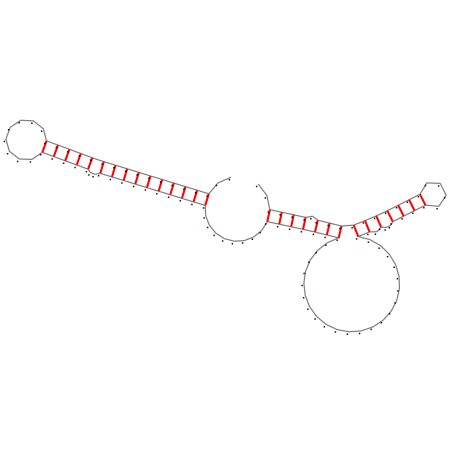

In [24]:
import tempfile
from IPython.display import SVG

sequence="".join(["." for i in range(len(ss))])

fp = tempfile.NamedTemporaryFile(suffix=".svg", delete=False)
RNA.svg_rna_plot(sequence, structure=ss, ssfile=fp.name)
SVG(fp.name)